In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [2]:
cntryname = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','GRC','ITA', 'JPN', 'NLD', 'NZL','NOR','PRT','ESP','SWE','GBR','USA']

In [3]:
trade = pd.read_csv("../code/julia/model-data-trade.csv")

In [4]:
trade.head()

,trade,distance,border,bin375,bin750,bin1500,bin3000,bin6000,binmax,distbin,importer,exporter,sharedlanguage,europeancom,efta,trademodel
0,-7.410,9891.0,0,0,0,0,0,0,1,6.0,1,2,0,0,0,-7.814125
1,-10.074,10389.0,0,0,0,0,0,0,1,6.0,1,3,0,0,0,-10.325030
2,-5.826,10009.0,0,0,0,0,0,0,1,6.0,1,4,1,0,0,-5.559984
3,-8.206,9968.0,0,0,0,0,0,0,1,6.0,1,5,0,0,0,-8.537031
4,-6.461,9453.0,0,0,0,0,0,0,1,6.0,1,6,0,0,0,-7.065650


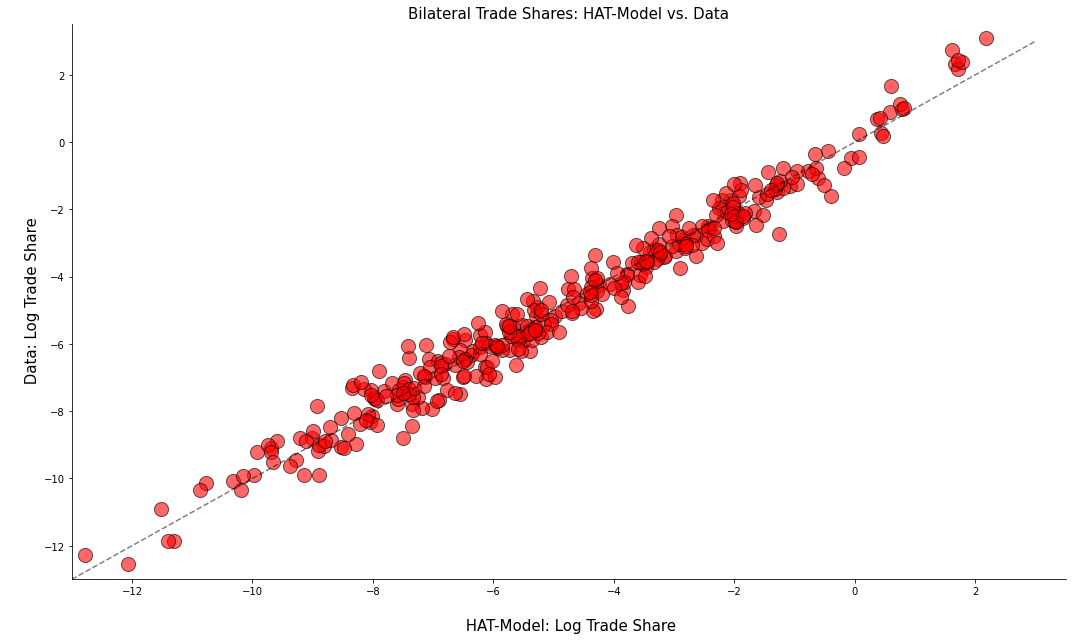

In [5]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,4), range(-13,4), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: HAT-Model vs. Data", fontsize = 15)

ax.set_xlabel("\n HAT-Model: Log Trade Share", fontsize = 15)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 15)

plt.savefig("../notes/figures/trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,3.5)
ax.set_xlim(-13.0,3.5)

plt.show()

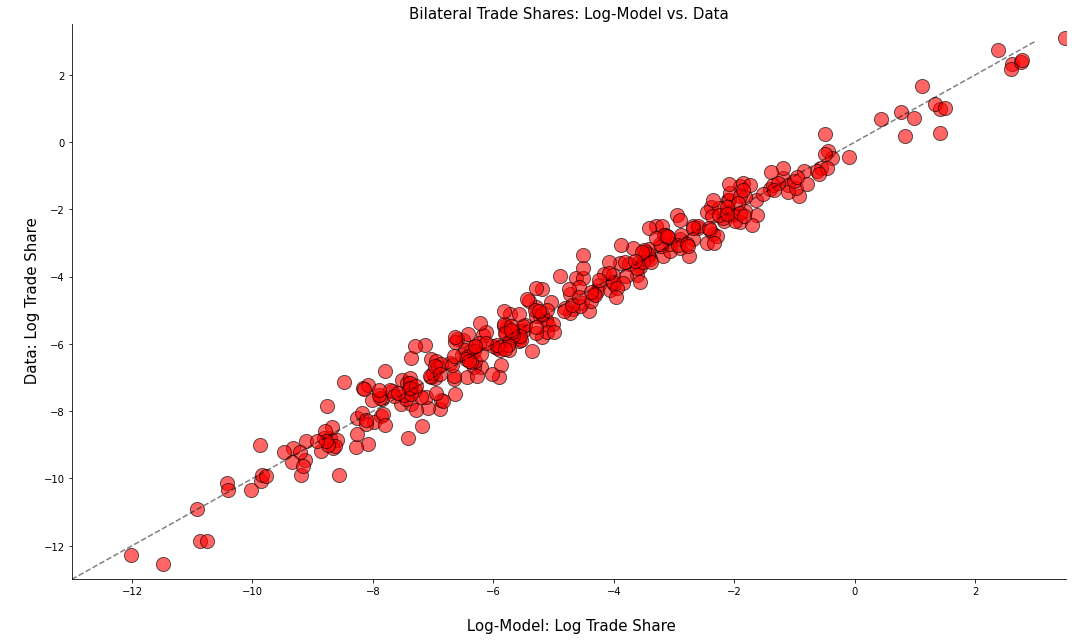

In [6]:
trade = pd.read_csv("../code/julia/log-model-data-trade.csv")

fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,4), range(-13,4), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: Log-Model vs. Data", fontsize = 15)

ax.set_xlabel("\n Log-Model: Log Trade Share", fontsize = 15)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 15)

plt.savefig("../notes/figures/log-trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,3.5)
ax.set_xlim(-13.0,3.5)

plt.show()

In [7]:
elasty = pd.read_csv("../code/julia/elasticity-by-partner.csv")

In [8]:
elasty.head()

,θ,p,trade
0,-4.757237,7.397524,0.000618
1,-5.254840,10.140501,0.000127
2,-6.160704,16.086263,0.000009
3,-3.708208,3.285290,0.019206
4,-5.510338,11.667961,0.000060


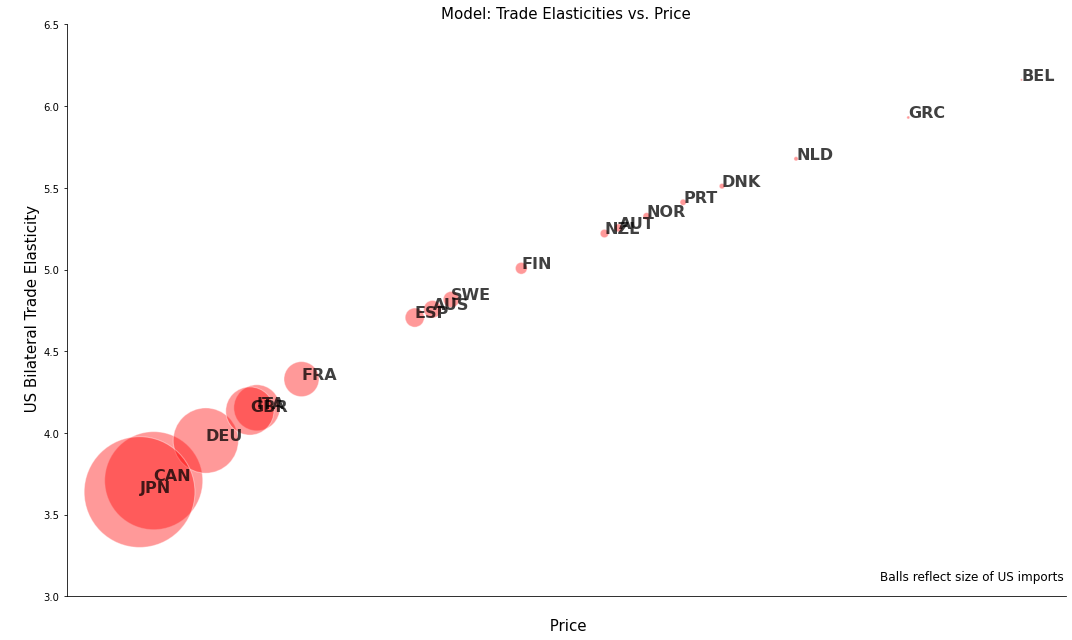

In [61]:
fig, ax = plt.subplots(figsize = [15.0, 9.0], tight_layout = True)

ax.scatter(elasty.p[0:18], -elasty.θ[0:18], alpha = 0.40,
           c = "red", edgecolors = "white",
           s = 500000*elasty.trade[0:18])

for i, txt in enumerate(cntryname[0:18]):
    ax.annotate(txt, (elasty.p[i], -elasty.θ[i]), 
                fontsize = 16, weight='bold', color = "black", alpha = 0.75)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Model: Trade Elasticities vs. Price", fontsize = 15)

ax.set_xlabel("\n Price", fontsize = 15)
ax.set_ylabel("\n US Bilateral Trade Elasticity" , fontsize = 15)

ax.set_xticks([])

ax.set_ylim(3.0, 6.5)
ax.set_xlim(2.0)

ax.text(14, 3.10, "Balls reflect size of US imports", fontsize = 12)

plt.savefig("../notes/figures/us-elasticity.pdf", bbox_inches = "tight")

plt.show()